# Visualização de dados financeiros

In [5]:
#!pip install pandas_datareader

In [43]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import seaborn as srn
import matplotlib.pyplot as plt
import plotly.express as px
srn.set()

## Base de dados com uma ação

Feito no yahoo!finanças para Gol de São Paulo a partir de 2015 até hoje.

In [7]:
gol_df = data.DataReader(name='GOLL4.SA', 
                         data_source='yahoo', 
                         start='2015-01-01')
print(gol_df.shape)
gol_df.head()

(1799, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,15.20,14.61,14.97,14.99,901900,14.99
2015-01-05,15.01,14.41,14.90,14.85,1272500,14.85
2015-01-06,15.21,14.65,14.75,15.21,2183500,15.21
2015-01-07,15.33,14.55,15.15,14.55,1846900,14.55
2015-01-08,14.65,14.20,14.41,14.27,1569500,14.27


In [11]:
print(gol_df.info())
gol_df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1799 entries, 2015-01-02 to 2022-03-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1799 non-null   float64
 1   Low        1799 non-null   float64
 2   Open       1799 non-null   float64
 3   Close      1799 non-null   float64
 4   Volume     1799 non-null   int64  
 5   Adj Close  1799 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 98.4 KB
None


,count,mean,std,min,25%,50%,75%,max
High,1799.0,1.620853e+01,9.830051e+00,0.00,7.950,15.15,2.241000e+01,4.462000e+01
Low,1799.0,1.541410e+01,9.466661e+00,0.00,7.610,14.38,2.131000e+01,4.131000e+01
Open,1799.0,1.582115e+01,9.652272e+00,0.00,7.770,14.75,2.201000e+01,4.367000e+01
Close,1799.0,1.579349e+01,9.638045e+00,1.16,7.775,14.80,2.190000e+01,4.379000e+01
Volume,1799.0,5.086417e+06,4.747393e+06,0.00,2018100.000,3630800.00,6.461850e+06,4.368050e+07
Adj Close,1799.0,1.579349e+01,9.638045e+00,1.16,7.775,14.80,2.190000e+01,4.379000e+01


In [14]:
gol_df[gol_df['Close'] == gol_df['Close'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-01,44.619999,41.25,41.25,43.790001,6664200,43.790001


In [15]:
gol_df[gol_df['Close'] == gol_df['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-22,1.26,1.14,1.2,1.16,3830600,1.16


In [21]:
#gol_df.to_csv('gol.csv')
gol = pd.read_csv('gol.csv')
gol

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,15.200000,14.610000,14.970000,14.990000,901900,14.990000
1,2015-01-05,15.010000,14.410000,14.900000,14.850000,1272500,14.850000
2,2015-01-06,15.210000,14.650000,14.750000,15.210000,2183500,15.210000
3,2015-01-07,15.330000,14.550000,15.150000,14.550000,1846900,14.550000
4,2015-01-08,14.650000,14.200000,14.410000,14.270000,1569500,14.270000
...,...,...,...,...,...,...,...
1794,2022-03-24,16.250000,15.650000,15.760000,16.240000,7272600,16.240000
1795,2022-03-25,17.129999,16.440001,16.600000,16.889999,7256100,16.889999
1796,2022-03-28,17.450001,16.700001,17.139999,17.049999,5381600,17.049999
1797,2022-03-29,18.030001,17.480000,17.620001,17.480000,6029600,17.480000


## Base de dados com mais ações

Lembrando que BOVA11 é o conjunto de várias empresas brasileiras do Bovespa.

In [24]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']
acoes_df = pd.DataFrame()
for acao in acoes:
    acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']

In [31]:
acoes_df.rename(columns={'GOLL4.SA':'GOL', 'CVCB3.SA': 'CVC','WEGE3.SA':'WEGE' ,'MGLU3.SA':'MGLU', 'TOTS3.SA':'TOTS', 'BOVA11.SA':'BOVA'}, inplace=True)
acoes_df

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-02,14.990000,15.200000,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.850000,15.000000,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.210000,14.800000,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.550000,14.670000,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.270000,14.150000,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2022-03-23,15.560000,14.560000,32.750000,6.000000,34.599998,112.900002
2022-03-24,16.240000,15.420000,33.130001,6.600000,34.849998,114.739998
2022-03-25,16.889999,15.990000,32.880001,6.540000,34.380001,114.750000


In [35]:
acoes_df.isnull().sum()
#acoes_df.dropna(inplace=True)

GOL     0
CVC     0
WEGE    0
MGLU    0
TOTS    0
BOVA    0
dtype: int64

In [37]:
print(acoes_df.info())
acoes_df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1798 entries, 2015-01-02 to 2022-03-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOL     1798 non-null   float64
 1   CVC     1798 non-null   float64
 2   WEGE    1798 non-null   float64
 3   MGLU    1798 non-null   float64
 4   TOTS    1798 non-null   float64
 5   BOVA    1798 non-null   float64
dtypes: float64(6)
memory usage: 98.3 KB
None


,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000
mean,15.792553,30.123696,15.420513,7.060145,16.721674,79.359668
std,9.640644,15.660195,12.048360,7.959571,9.061154,23.806490
min,1.160000,6.106568,4.942307,0.030585,7.156402,36.450001
25%,7.772500,17.200001,6.576923,0.357997,9.981036,57.799999
50%,14.800000,23.705000,9.078462,3.922969,11.578001,78.434998
75%,21.900000,44.192500,22.903750,11.324375,24.496666,100.000000
max,43.790001,64.800003,46.105000,27.450001,40.599998,125.750000


In [34]:
#acoes_df.to_csv('acoes.csv')
acoes = pd.read_csv('acoes.csv')
acoes.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998


## Gráfico das ações

### Histograma

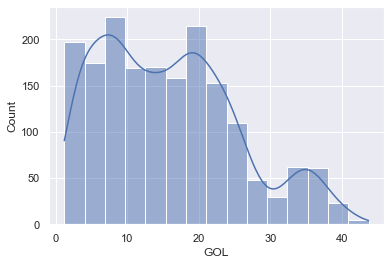

In [41]:
srn.histplot(acoes_df['GOL'], 
             kde=True, 
             bins=15);

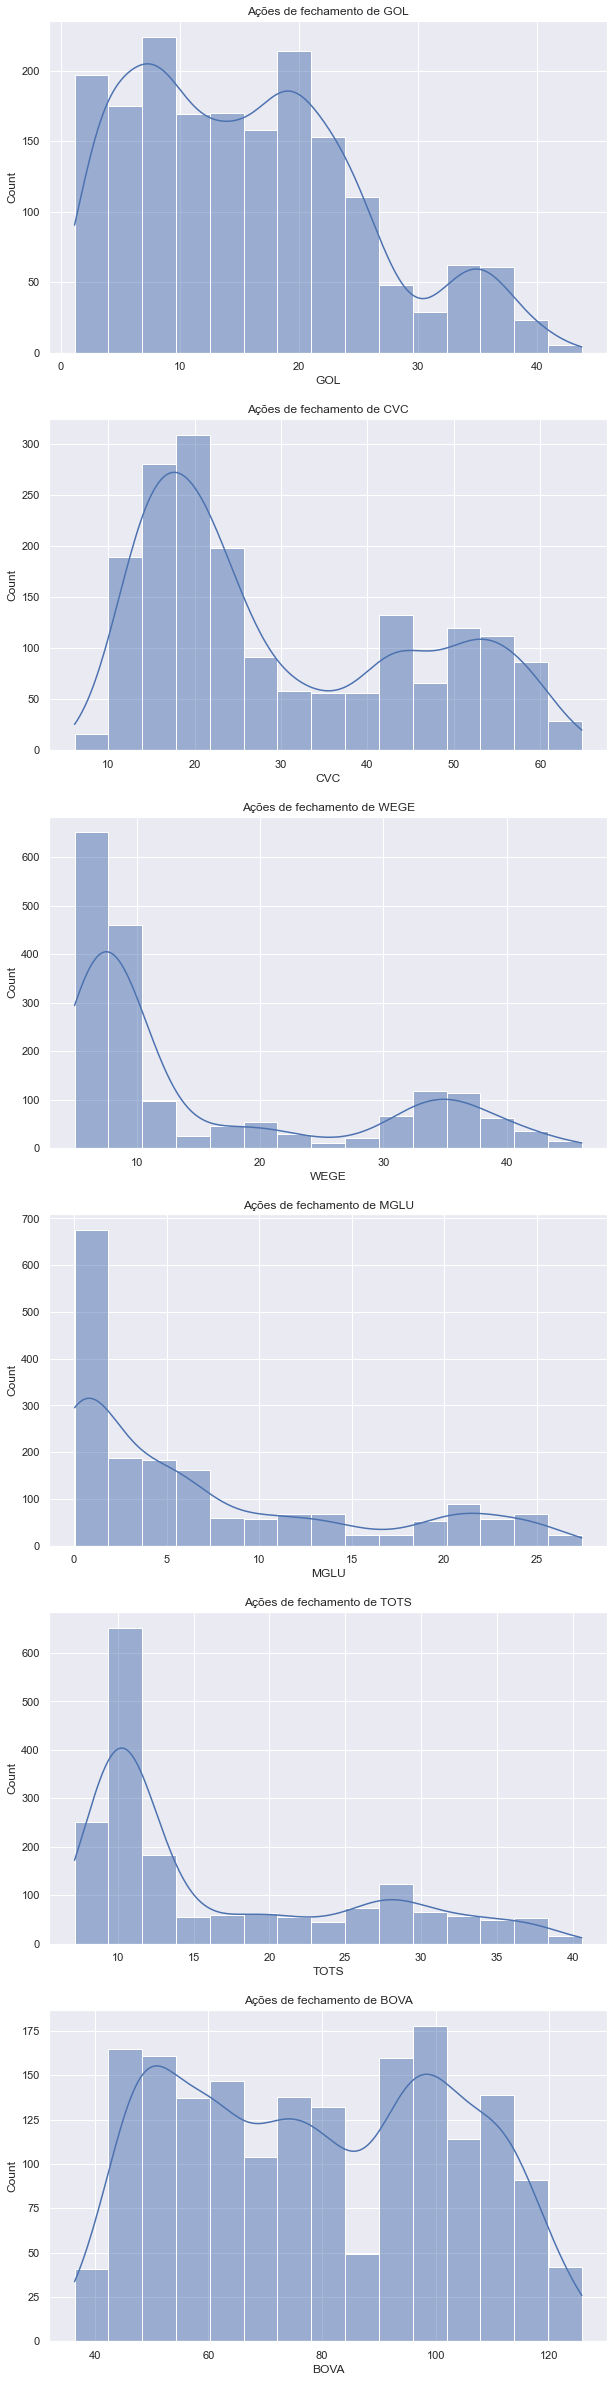

In [51]:
plt.figure(figsize=(10,50))
for i in range(len(acoes_df.columns)):
    plt.subplot(7, 1, i+1)
    srn.histplot(acoes_df[acoes_df.columns[i]], kde=True, bins=15);
    plt.title(f'Ações de fechamento de {acoes_df.columns[i]}')